# Spatial distribution of the change of HDD and CDD
    
Written by Gesangyangji; last updated Feb 5, 202 <br>

In this code, we will research the change of annual HDD and CDD, under RCP4.5 and RCP8.5.

In [1]:
import matplotlib   
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib as mpl
from matplotlib import *
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns


import numpy as np                  
import pandas as pd 
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings

from loadingdata import getvarsfordecades
from loadingdata import csv2dict


In [2]:
warnings.filterwarnings("ignore")

## Step 1:  Load data

In [3]:
yrstr = ['2011_2030','2021_2040','2031_2050','2041_2060','2051_2070','2061_2080','2071_2090','2081_2100']; 
CityLname = ['MADISON','CHICAGO','ATLANTA','BOSTON', 'DALLAS', 'MIAMI', 'HOUSTON','NASHVILLE','OMAHA', 
             'STLOUIS', 'COLUMBUS','MINNEAPOLIS','NEWYORK', 'RALEIGH', 'WASHINGTONDC'] 
CitySname = ['MSN','MDW','ATL','BOS','DFW','MIA','IAH','BNA','OMA',
             'STL','CMH','MSP','JFK','RDU','IAD']

In [4]:
# check what vars are in the file
rawdata = csv2dict('MADISON', '2011_2030', 'rcp45') # data for different cities, scens,decades are in the same format
rawdata.keys()

dict_keys(['m', 'db1', 'db2', 'ws1', 'mdb1', 'ws2', 'mdb2', 'mws1', 'mwd1', 'x', 'mrange', 'mws3', 'mwd3', 'db', 'mcwb', 'wb', 'mcdb', 'extreme_max_wb', 'dp', 'hr', 'mcdb_dp', 'enthalpy', 'mcdb_enth', 'extreme_ws', 'mean_min', 'mean_max', 'sd_min', 'sd_max', 'T_n_min', 'T_n_max', 'Annual_Tavg', 'Tavg', 'Sd', 'Annual_HDD_10', 'HDD_10', 'Annual_HDD_183', 'HDD_183', 'Annual_CDD_10', 'CDD_10', 'Annual_CDD_183', 'CDD_183', 'Annual_CDH_233', 'CDH_233', 'Annual_CDH_267', 'CDH_267', 'M_DB_Range', 'Monthly_DB_db', 'Monthly_DB_wb', 'Monthly_WB_db', 'Monthly_WB_wb', 'mo_db_04', 'mo_mcwb_04', 'mo_db_2', 'mo_mcwb_2', 'mo_db_5', 'mo_mcwb_5', 'mo_db_10', 'mo_mcwb_10', 'mo_wb_04', 'mo_mcdb_04', 'mo_wb_2', 'mo_mcdb_2', 'mo_wb_5', 'mo_mcdb_5', 'mo_wb_10', 'mo_mcdb_10', 'hours8_4'])

In [5]:
# select ur target var,scen, and load the data
df45_cdd1 = getvarsfordecades(CityLname,yrstr,'Annual_CDD_10','rcp45')
df85_cdd1 = getvarsfordecades(CityLname,yrstr,'Annual_CDD_10','rcp85')

df45_cdd2 = getvarsfordecades(CityLname,yrstr,'Annual_CDD_183','rcp45')
df85_cdd2 = getvarsfordecades(CityLname,yrstr,'Annual_CDD_183','rcp85')

# laoding heating degree days
df45_hdd1 = getvarsfordecades(CityLname,yrstr,'Annual_HDD_10','rcp45')
df85_hdd1 = getvarsfordecades(CityLname,yrstr,'Annual_HDD_10','rcp85')

df45_hdd2 = getvarsfordecades(CityLname,yrstr,'Annual_HDD_183','rcp45')
df85_hdd2 = getvarsfordecades(CityLname,yrstr,'Annual_HDD_183','rcp85')


df45_cdd2

,city,lat,lon,2011_2030,2021_2040,2031_2050,2041_2060,2051_2070,2061_2080,2071_2090,2081_2100
0,MADISON,43.14N,89.35W,[459.952761],[507.030926],[557.756512],[604.323363],[642.351737],[677.682349],[698.601527],[713.621836]
1,MINNEAPOLIS,44.88N,93.23W,[547.524784],[591.992325],[641.858816],[693.077863],[733.154671],[769.803735],[792.367483],[809.985745]
2,WASHINGTONDC,38.94N,77.45W,[819.318153],[891.730791],[964.874804],[1023.041836],[1073.867791],[1120.817731],[1144.805131],[1161.541372]
3,MIAMI,25.82N,80.3W,[2885.087331],[3013.156619],[3139.103606],[3258.153705],[3377.499394],[3467.061336],[3532.048707],[3573.860575]
4,COLUMBUS,39.99N,82.88W,[700.132991],[761.224647],[822.457300],[873.905466],[918.557889],[958.681365],[978.907499],[993.064649]
5,STLOUIS,38.75N,90.37W,[1084.969567],[1157.853995],[1229.858840],[1290.369357],[1338.660469],[1380.174941],[1405.145933],[1427.495626]
6,RALEIGH,35.87N,78.79W,[1121.978781],[1207.730987],[1294.691476],[1366.989076],[1430.414903],[1488.246289],[1522.209748],[1540.766686]
7,NASHVILLE,36.12N,86.69W,[1128.826763],[1203.392115],[1275.137913],[1335.224551],[1388.940809],[1434.847504],[1459.646387],[1478.487599]
8,ATLANTA,33.64N,84.43W,[1219.404170],[1297.583808],[1374.496312],[1437.991862],[1494.049537],[1544.253014],[1573.906577],[1591.293604]
9,BOSTON,42.36N,71.01W,[557.126094],[623.880926],[690.528822],[739.217623],[786.199860],[824.922183],[845.461546],[867.059277]


## Step 2: Preparing data for plotting 
The main work here is to calculate the percentage change of variables by mid and late century.

In [6]:
# some usful functions
def str2num_latlon(oldlist):
    newlist = []
    for val in oldlist:
        newlist.append(float(val[:-1]))
    return newlist

def str2num(decade):
    newlist = []
    for val in decade:
        newlist.append(int(round(float(val[0]),2))) 
    return newlist

def flip(lst):
    return [ -i for i in lst ] 

def perctchange(list1,list2):
    changelst = []
    for i in range(len(list1)):
        perc_diff = (list2[i]-list1[i])/list1[i]
        changelst.append(round(perc_diff*100,2))
    return changelst 

def df_with_percentchange(list1, list2, list3):
    data_pres = str2num(list1)
    data_mid = str2num(list2)
    data_late = str2num(list3)
    prechange_mid = perctchange(data_pres,data_mid)
    prechange_late = perctchange(data_pres,data_late)
    dplot = pd.DataFrame({'2020':data_pres,'2050':data_mid,'2090':data_late,
                            '2020-2050':prechange_mid,'2020-2090':prechange_late})
    return dplot

def orderby_lat(df):
    df['orderbylat']=str2num_latlon(df45_cdd2['lat'])
    df.sort_values(by=['orderbylat'],ascending=False,inplace=True)
    df.drop(['orderbylat'],axis=1,inplace=True)
    return df

In [7]:
# subset data
city = df45_cdd1['city']
lat = str2num_latlon(list(df45_cdd1['lat']))
lon = flip(str2num_latlon(list(df45_cdd1['lon'])))
dfgeo = pd.DataFrame({'city':city,'lat':lat,'lon':lon})

In [8]:
# creat new df for each variable, each scenario 
df = df_with_percentchange(list(df45_cdd2['2011_2030']),list(df45_cdd2['2041_2060']),list(df45_cdd2['2081_2100']))
new_df45_cdd2 = pd.merge(dfgeo,df,right_index=True,left_index=True)

df = df_with_percentchange(list(df45_hdd2['2011_2030']),list(df45_hdd2['2041_2060']),list(df45_hdd2['2081_2100']))
new_df45_hdd2 = pd.merge(dfgeo,df,right_index=True,left_index=True)

df = df_with_percentchange(list(df85_cdd2['2011_2030']),list(df85_cdd2['2041_2060']),list(df85_cdd2['2081_2100']))
new_df85_cdd2 = pd.merge(dfgeo,df,right_index=True,left_index=True)

df = df_with_percentchange(list(df85_hdd2['2011_2030']),list(df85_hdd2['2041_2060']),list(df85_hdd2['2081_2100']))
new_df85_hdd2 = pd.merge(dfgeo,df,right_index=True,left_index=True)
new_df85_cdd2

,city,lat,lon,2020,2050,2090,2020-2050,2020-2090
0,MADISON,43.14,-89.35,462,688,1146,48.92,148.05
1,MINNEAPOLIS,44.88,-93.23,547,778,1240,42.23,126.69
2,WASHINGTONDC,38.94,-77.45,825,1141,1727,38.30,109.33
3,MIAMI,25.82,-80.30,2877,3506,4565,21.86,58.67
4,COLUMBUS,39.99,-82.88,703,974,1504,38.55,113.94
5,STLOUIS,38.75,-90.37,1097,1404,1992,27.99,81.59
6,RALEIGH,35.87,-78.79,1130,1511,2210,33.72,95.58
7,NASHVILLE,36.12,-86.69,1137,1455,2069,27.97,81.97
8,ATLANTA,33.64,-84.43,1229,1561,2192,27.01,78.36
9,BOSTON,42.36,-71.01,561,843,1380,50.27,145.99


## Step 3: Plot

In [9]:
# this function plot either absolute value or percentage change(color), size does not give any information 
def geoscatter2(ax,dplot,val,new_cmap):
    ax = ax
    lat = dplot.lat
    lon = dplot.lon
    color = dplot[val]
    new_cmap = new_cmap
    
    ax.set_extent([-105,-60,24,48], ccrs.PlateCarree())
    ax.add_feature(cfeature.STATES,linewidth=0.6)
    ax.coastlines(linewidth=0.6)
    plt = ax.scatter(lon,lat,
           s=200,
           c=color,
           cmap=new_cmap,
           vmin=vmin,vmax=vmax,
           transform=ccrs.PlateCarree())
    return plt

### <b>1: percent change of CDD18.3 and HDD18.3<b/> 

12.93 148.05


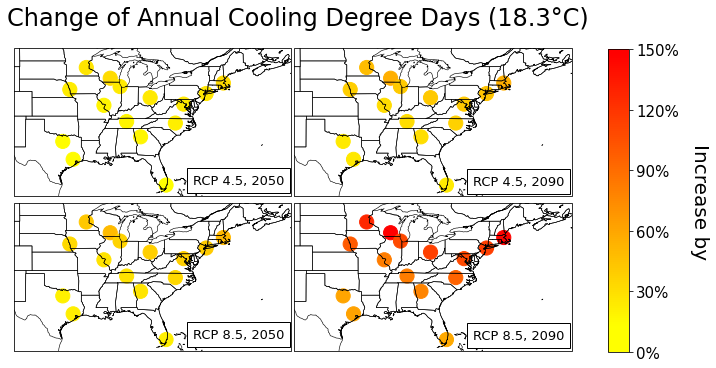

In [10]:
dplot45 = new_df45_cdd2
dplot85 = new_df85_cdd2


fig, axes = plt.subplots(figsize=(10,6))
# make a new color map 
list_colors = ['skyblue','yellowgreen','gold','salmon','red','darkred']
# new_cmap = LinearSegmentedColormap.from_list('new_cmap',list_colors,N = len(list_colors)) 
# new_cmap = mpl.colors.ListedColormap(list_colors)
# new_cmap = 'hot'
# new_cmap = ListedColormap(new_cmap.colors[::-1]) 
new_cmap = matplotlib.cm.get_cmap('autumn_r') # reserve cmap: color_r


# set a common colormap
data = list(dplot45['2020-2050'])
for x in list(dplot85['2020-2090']):
    data.append(x)
vmax,vmin = max(data),min(data)
print(vmin,vmax)

scale = 6
 
ax1 = plt.subplot(2,2,1, projection=ccrs.PlateCarree())
p = geoscatter2(ax1,dplot45,'2020-2050',new_cmap) # use p to get the color bar info 
ax1.text(-76,26, 'RCP 4.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax2 = plt.subplot(2,2,2, projection=ccrs.PlateCarree())
geoscatter2(ax2,dplot45,'2020-2090',new_cmap)
ax2.text(-76,25.9, 'RCP 4.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax3 = plt.subplot(2,2,3, projection=ccrs.PlateCarree())
geoscatter2(ax3,dplot85,'2020-2050',new_cmap)
ax3.text(-76,26, 'RCP 8.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax4 = plt.subplot(2,2,4, projection=ccrs.PlateCarree())
geoscatter2(ax4,dplot85,'2020-2090',new_cmap)
ax4.text(-76,25.9, 'RCP 8.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})


# colorbar set up
cbaxes = fig.add_axes([0.95, 0.15, 0.03, 0.7]) 
ticks = np.linspace(0, 150, num=6, endpoint=True)
cb = plt.colorbar(p,cax = cbaxes,orientation='vertical',ticks=ticks,boundaries=np.linspace(0, 150, 151))
label = [str(int(np.round(it,0)))+"%" for it in ticks]
cb.ax.set_yticklabels(label)                
cb.ax.tick_params(labelsize=15)
cb.set_label('Increase by',labelpad=30,rotation=270,fontsize=20)


fig.suptitle('Change of Annual Cooling Degree Days (18.3°C)',fontsize=24,y=0.95,x=0.52)
# plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=-0.1)

# fig.savefig('results_plot/annualcdd183_percentchange.png',dpi=fig.dpi,bbox_inches='tight')
plt.show()

-86.96 -9.21


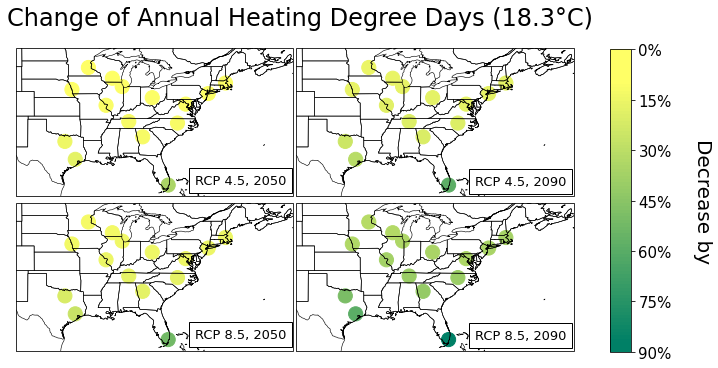

In [11]:
dplot45 = new_df45_hdd2
dplot85 = new_df85_hdd2


fig, axes = plt.subplots(figsize=(10,6))
# make a new color map 
list_colors = ['skyblue','yellowgreen','gold','salmon','red','darkred']
# new_cmap = LinearSegmentedColormap.from_list('new_cmap',list_colors,N = len(list_colors)) 
new_cmap = matplotlib.cm.get_cmap('summer') 
     
# set a common colormap
data = list(dplot45['2020-2050'])
for x in list(dplot85['2020-2090']):
    data.append(x)
vmax,vmin = max(data),min(data)
print(vmin,vmax)

scale = 6
 
ax1 = plt.subplot(2,2,1, projection=ccrs.PlateCarree())
p = geoscatter2(ax1,dplot45,'2020-2050',new_cmap) # use p to get the color bar info 
ax1.text(-76,26, 'RCP 4.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax2 = plt.subplot(2,2,2, projection=ccrs.PlateCarree())
geoscatter2(ax2,dplot45,'2020-2090',new_cmap)
ax2.text(-76,25.9, 'RCP 4.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax3 = plt.subplot(2,2,3, projection=ccrs.PlateCarree())
geoscatter2(ax3,dplot85,'2020-2050',new_cmap)
ax3.text(-76,26, 'RCP 8.5, 2050', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax4 = plt.subplot(2,2,4, projection=ccrs.PlateCarree())
geoscatter2(ax4,dplot85,'2020-2090',new_cmap)
ax4.text(-76,25.9, 'RCP 8.5, 2090', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})


# colorbar set up
cbaxes = fig.add_axes([0.95, 0.15, 0.03, 0.7]) 
ticks = np.linspace(-90,0, num=7, endpoint=True)
cb = plt.colorbar(p,cax = cbaxes,orientation='vertical',ticks=ticks,boundaries=np.linspace(-90,0,90))
label = [str(int(np.round(-it,0)))+"%" for it in ticks]
cb.ax.set_yticklabels(label)                
cb.ax.tick_params(labelsize=15)
cb.set_label('Decrease by',labelpad=40,rotation=270,fontsize=20)


fig.suptitle('Change of Annual Heating Degree Days (18.3°C)',fontsize=24,y=0.95,x=0.52)
# plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.01, hspace=-0.1)

# fig.savefig('results_plot/annualhdd183_percentchange.png',dpi=fig.dpi,bbox_inches='tight')
plt.show()

### <b>2: percent change of CDD18.3 and HDD18.3 by 2090 under rcp8.5<b/> 

23.85 148.05


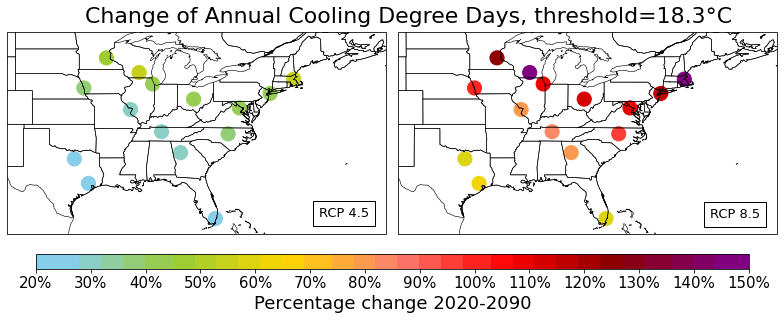

In [12]:
# this function plot either absolute value or percentage change(color), size does not give any information 

dplot45 = new_df45_cdd2
dplot85 = new_df85_cdd2

fig, axes = plt.subplots(figsize=(11,7))
# make a new color map 
list_colors = ['skyblue','yellowgreen','gold','salmon','red','darkred','purple']
new_cmap = LinearSegmentedColormap.from_list('new_cmap',list_colors,N=30 ) 


# set a common colormap
data = list(dplot45['2020-2090'])
for x in list(dplot85['2020-2090']):
    data.append(x)
vmax,vmin = max(data),min(data)
print(vmin,vmax)

scale = 6
 
ax1 = plt.subplot(1,2,1, projection=ccrs.PlateCarree())
p = geoscatter2(ax1,dplot45,'2020-2090',new_cmap) # use p to get the color bar info 
ax1.text(-68,26, 'RCP 4.5', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax2 = plt.subplot(1,2,2, projection=ccrs.PlateCarree())
geoscatter2(ax2,dplot85,'2020-2090',new_cmap)
ax2.text(-68,25.9, 'RCP 8.5', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})


#colorbar set up
cbaxes = fig.add_axes([0.05, 0.23, 0.9, 0.03]) 
ticks = np.linspace(20,150, num=14, endpoint=True)
# cb = fig.colorbar(p,cax = cbaxes,orientation='horizontal')
cb = plt.colorbar(p,cax = cbaxes,orientation='horizontal',ticks=ticks,boundaries=np.linspace(20,150,131))

label = [str(int(np.round(it,0)))+"%" for it in ticks]
cb.ax.set_xticklabels(label)                
cb.ax.tick_params(labelsize=15)
cb.set_label('Percentage change 2020-2090',fontsize=18)

fig.suptitle('Change of Annual Cooling Degree Days, threshold=18.3°C',fontsize=22,y=0.75,x=0.52)   
plt.tight_layout()

# fig.savefig('results_plot/annualcdd183_rcp85_2090.png',dpi=fig.dpi,bbox_inches='tight')
plt.show()

-86.96 -15.43


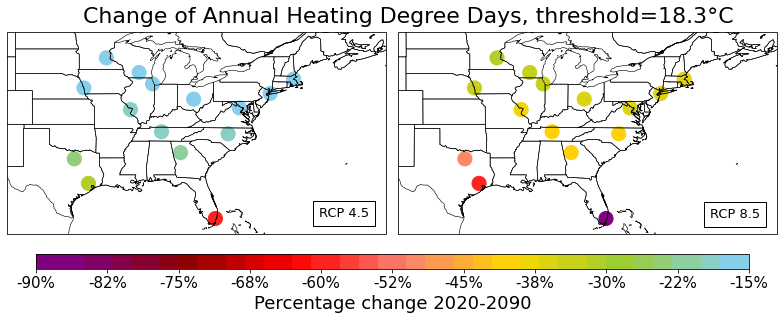

In [13]:
# this function plot either absolute value or percentage change(color), size does not give any information 

dplot45 = new_df45_hdd2
dplot85 = new_df85_hdd2

fig, axes = plt.subplots(figsize=(11,7))
# make a new color map 
list_colors = ['skyblue','yellowgreen','gold','salmon','red','darkred','purple']
new_cmap = LinearSegmentedColormap.from_list('new_cmap',list_colors,N=50 ) 
list_colors.reverse()
new_cmap = LinearSegmentedColormap.from_list('new_cmap',list_colors,N=30 ) 


# set a common colormap
data = list(dplot45['2020-2090'])
for x in list(dplot85['2020-2090']):
    data.append(x)
vmax,vmin = max(data),min(data)
print(vmin,vmax)

scale = 6
 
ax1 = plt.subplot(1,2,1, projection=ccrs.PlateCarree())
p = geoscatter2(ax1,dplot45,'2020-2090',new_cmap) # use p to get the color bar info 
ax1.text(-68,26, 'RCP 4.5', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})

ax2 = plt.subplot(1,2,2, projection=ccrs.PlateCarree())
geoscatter2(ax2,dplot85,'2020-2090',new_cmap)
ax2.text(-68,25.9, 'RCP 8.5', fontsize=13,bbox={'facecolor': 'white', 'alpha': 1, 'pad': 6})


#colorbar set up
cbaxes = fig.add_axes([0.05, 0.23, 0.9, 0.03]) 
ticks = np.linspace(-90,-15,num=11, endpoint=True)
# cb = fig.colorbar(p,cax = cbaxes,orientation='horizontal')
cb = plt.colorbar(p,cax = cbaxes,orientation='horizontal',ticks=ticks,boundaries=np.linspace(-90,-15,76))

label = [str(int(np.round(it,0)))+"%" for it in ticks]
cb.ax.set_xticklabels(label)                
cb.ax.tick_params(labelsize=15)
cb.set_label('Percentage change 2020-2090',fontsize=18)

fig.suptitle('Change of Annual Heating Degree Days, threshold=18.3°C',fontsize=22,y=0.75,x=0.52)   
plt.tight_layout()

# fig.savefig('results_plot/annualhdd183_rcp85_2090.png',dpi=fig.dpi,bbox_inches='tight')
plt.show()

### <b>3: projected time series of CDD and HDD 18.3 <b/>
here, we will look how CDD and HDD change with time in the 21st, under rcp 4.5 and rcp 8.5

In [14]:
"""original dataframe: df45_cdd2  df45_hdd2  df85_cdd2  df85_hdd2"""

# subset a df for plotting 
city = df45_cdd2['city']
# lat = str2num_latlon(list(df45_cdd1['lat']))
# lon = flip(str2num_latlon(list(df45_cdd1['lon'])))
dfnew = pd.DataFrame({'city':city})
df45_hdd2.head()

,city,lat,lon,2011_2030,2021_2040,2031_2050,2041_2060,2051_2070,2061_2080,2071_2090,2081_2100
0,MADISON,43.14N,89.35W,[3626.687136],[3486.247187],[3376.113056],[3279.506881],[3186.932544],[3133.959175],[3095.394953],[3047.310254]
1,MINNEAPOLIS,44.88N,93.23W,[3831.314891],[3691.270994],[3579.776860],[3478.118248],[3382.186894],[3329.172235],[3288.869999],[3240.214433]
2,WASHINGTONDC,38.94N,77.45W,[2386.109780],[2288.531280],[2206.304689],[2144.395020],[2084.929711],[2045.786813],[2017.854269],[1980.702072]
3,MIAMI,25.82N,80.3W,[46.664456],[40.023743],[35.371752],[30.844242],[26.755376],[23.924971],[20.929529],[19.028191]
4,COLUMBUS,39.99N,82.88W,[2670.669438],[2555.763316],[2466.565760],[2394.435539],[2322.536647],[2282.792121],[2251.355118],[2205.662501]


In [15]:
def df_str2num(dataframe):
    # creat a new df to save numeric data
    df = pd.DataFrame(columns=yrstr)
    # covert str to num
    lst=[]
    for iy in yrstr: 
        ll = str2num(list(dataframe[iy]))
        lst.append(ll)

    for iy, y in enumerate(yrstr):
        df[y]=lst[iy]

    dff = pd.merge(dfnew,df,right_index=True,left_index=True)
    dff.set_index(['city'],inplace=True)
    return dff

In [16]:
# nre df is saved wilth orger by lat
dplot45_hdd = orderby_lat(df_str2num(df45_hdd2))
dplot85_hdd = orderby_lat(df_str2num(df85_hdd2))
dplot45_cdd = orderby_lat(df_str2num(df45_cdd2))
dplot85_cdd = orderby_lat(df_str2num(df85_cdd2))
dplot45_cdd.head()

,2011_2030,2021_2040,2031_2050,2041_2060,2051_2070,2061_2080,2071_2090,2081_2100
city,,,,,,,,
MINNEAPOLIS,547,591,641,693,733,769,792,809
MADISON,459,507,557,604,642,677,698,713
BOSTON,557,623,690,739,786,824,845,867
CHICAGO,715,774,835,888,930,970,992,1009
OMAHA,774,832,894,952,994,1033,1057,1077


#### 3.1 Change of DD change with time, under RCP 4.5, RCP 8.5. 

In [17]:
# creat one df for each city 
def DataFrame_city_change(cityname):
    icity = cityname
    df_t = pd.DataFrame({'year':['2020','2030','2040','2050','2060','2070','2080','2090']})
    rows = ['hdd45','hdd85','cdd45','cdd85']

    hdd45 = list(dplot45_hdd.loc[icity].values)
    hdd85 = list(dplot85_hdd.loc[icity].values)
    cdd45 = list(dplot45_cdd.loc[icity].values)
    cdd85 = list(dplot85_cdd.loc[icity].values)
    data = np.array([hdd45,hdd85,cdd45,cdd85]).T
    data = data-data[0]

    df_data = pd.DataFrame(data,columns=rows)
    df_city = pd.merge(df_t,df_data,right_index=True,left_index=True)
    df_city.set_index(['year'],inplace=True)
    return df_city


# this funtion plot lines for each city (change with reference year 2020)
def DDchange_line(ax,icity):
    city=list(dplot45_cdd.index)
    cityname=city[icity]
    df_city = DataFrame_city_change(cityname)

    ax.plot(df_city['hdd45'],color='dodgerblue',linewidth=1.5)
    ax.plot(df_city['hdd85'],color='blue',linewidth=1.5)
    ax.plot(df_city['cdd45'],color='magenta',linewidth=1.5)
    ax.plot(df_city['cdd85'],color='r',linewidth=1.5)
    plt.axhline(y=0,color='grey',linestyle='--',linewidth=1)

    ax.set_xlim((0,7.1))
    ax.set_ylim((-1500,1750))
    plt.title(cityname, loc='right')
    return plt

Text(0.5, 0.08, 'Year')

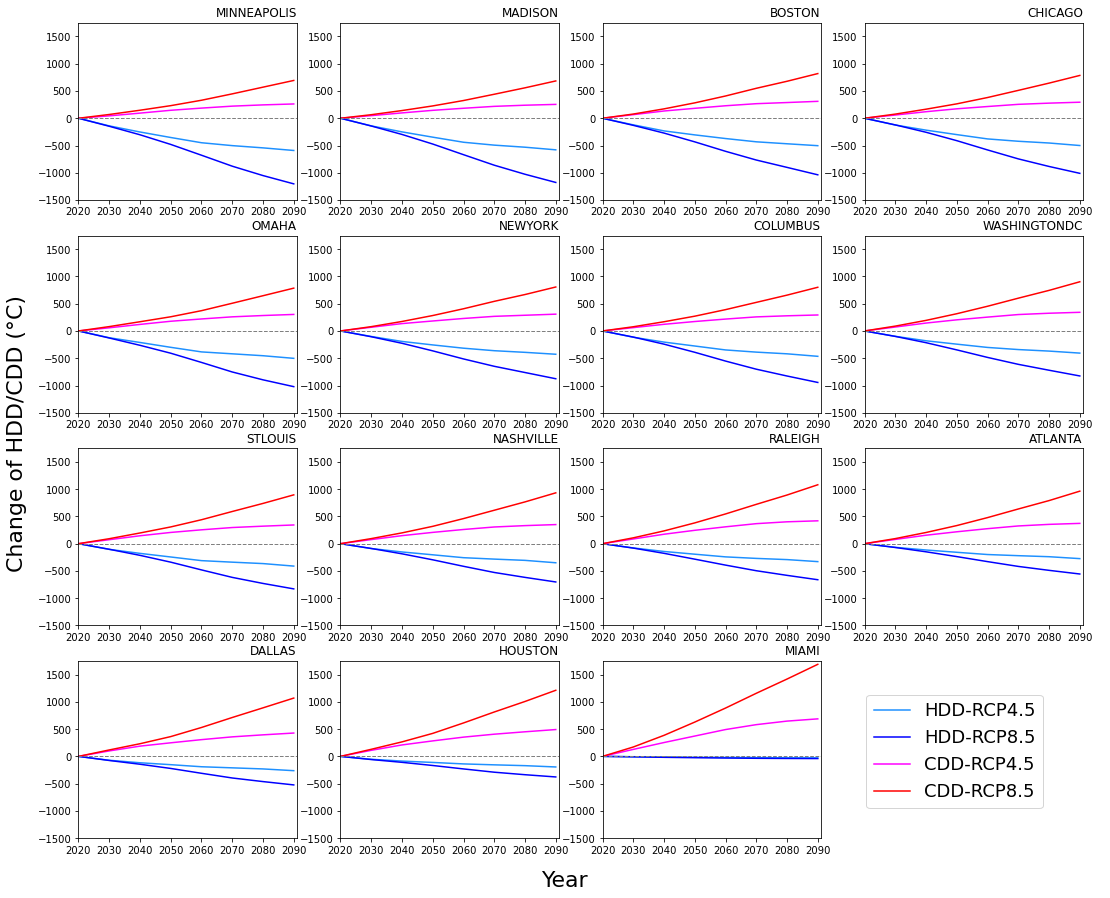

In [18]:
fig, ax = plt.subplots(figsize=(18,15))

ax1 = plt.subplot(4,4,1)
DDchange_line(ax1,0)

ax2 = plt.subplot(4,4,2)
DDchange_line(ax2,1)

ax3 = plt.subplot(4,4,3)
DDchange_line(ax3,2)

ax4 = plt.subplot(4,4,4)
DDchange_line(ax4,3)

ax5 = plt.subplot(4,4,5)
DDchange_line(ax5,4)

ax6 = plt.subplot(4,4,6)
DDchange_line(ax6,5)

ax7 = plt.subplot(4,4,7)
DDchange_line(ax7,6)

ax8 = plt.subplot(4,4,8)
DDchange_line(ax8,7)

ax9 = plt.subplot(4,4,9)
DDchange_line(ax9,8)

ax10 = plt.subplot(4,4,10)
DDchange_line(ax10,9)

ax11 = plt.subplot(4,4,11)
DDchange_line(ax11,10)

ax12 = plt.subplot(4,4,12)
DDchange_line(ax12,11)

ax13 = plt.subplot(4,4,13)
DDchange_line(ax13,12)

ax14 = plt.subplot(4,4,14)
DDchange_line(ax14,13)

ax15 = plt.subplot(4,4,15)
DDchange_line(ax15,14)


fig.legend(['HDD-RCP4.5','HDD-RCP8.5','CDD-RCP4.5','CDD-RCP8.5'],loc = (0.78,0.1), ncol=1, fontsize=18)
fig.text(0.07, 0.5, 'Change of HDD/CDD (°C)', va='center', rotation='vertical',fontsize=22)
fig.text(0.5, 0.08, 'Year', ha='center',fontsize=22)

# fig.savefig('results_plot/changofDD183_line.png',dpi=fig.dpi,bbox_inches='tight')


#### 3.2  Change of DD with time, under RCP 4.5, RCP 8.5. 

In [19]:
# creat one df for each city 
def DataFrame_city(cityname):
    icity = cityname
    df_t = pd.DataFrame({'year':['2020','2030','2040','2050','2060','2070','2080','2090']})
    rows = ['hdd45','hdd85','cdd45','cdd85']

    hdd45 = list(dplot45_hdd.loc[icity].values)
    hdd85 = list(dplot85_hdd.loc[icity].values)
    cdd45 = list(dplot45_cdd.loc[icity].values)
    cdd85 = list(dplot85_cdd.loc[icity].values)
    data = np.array([hdd45,hdd85,cdd45,cdd85]).T

    df_data = pd.DataFrame(data,columns=rows)
    df_city = pd.merge(df_t,df_data,right_index=True,left_index=True)
    df_city.set_index(['year'],inplace=True)
    return df_city

# this funtion plot lines for each city
def DD_line(ax,icity):
    city=list(dplot45_cdd.index)
    cityname=city[icity]
    df_city = DataFrame_city(cityname)

    ax.plot(df_city['hdd45'],color='dodgerblue',linewidth=1.5)
    ax.plot(df_city['hdd85'],color='blue',linewidth=1.5)
    ax.plot(df_city['cdd45'],color='magenta',linewidth=1.5)
    ax.plot(df_city['cdd85'],color='r',linewidth=1.5)

    ax.set_xlim((0,7.1))
    ax.set_ylim((0,5000))
    plt.title(cityname, loc='right')

    return plt

Text(0.5, 0.08, 'Year')

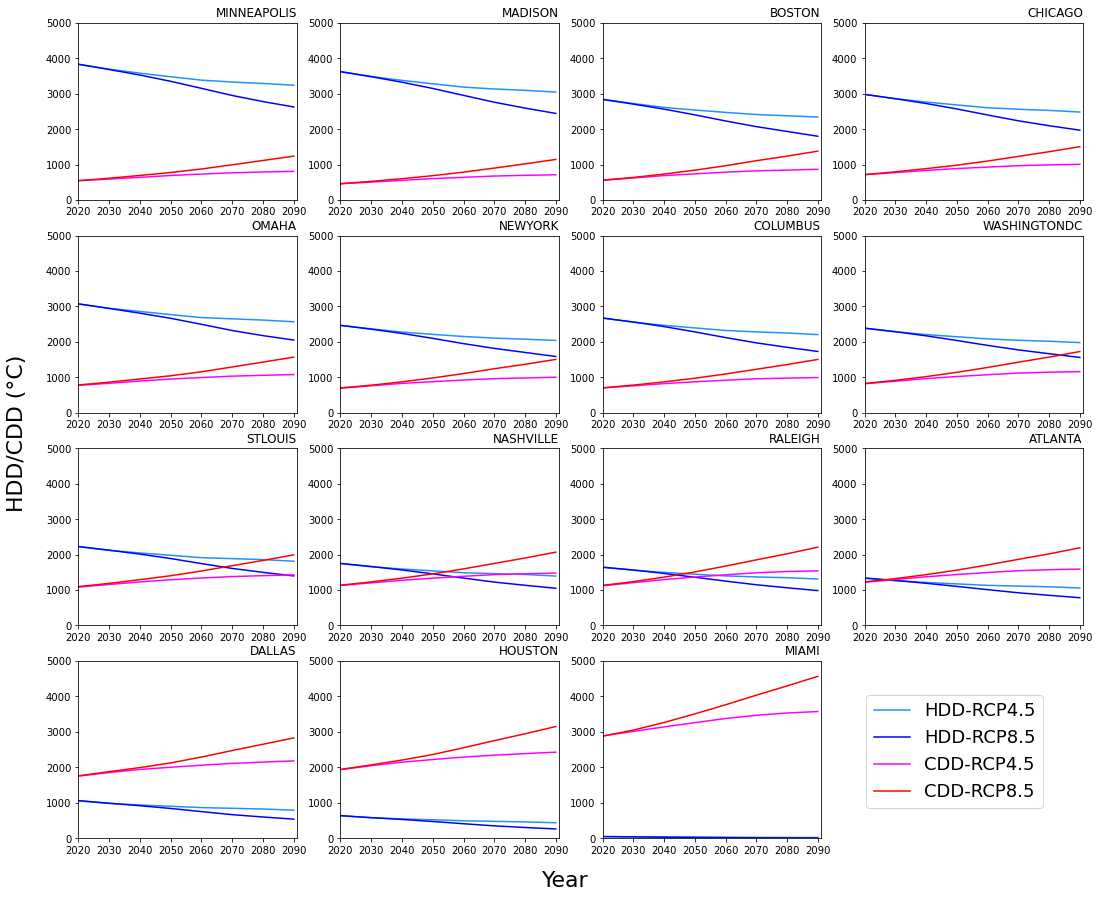

In [20]:
fig, ax = plt.subplots(figsize=(18,15))

ax1 = plt.subplot(4,4,1)
DD_line(ax1,0)

ax2 = plt.subplot(4,4,2)
DD_line(ax2,1)

ax3 = plt.subplot(4,4,3)
DD_line(ax3,2)

ax4 = plt.subplot(4,4,4)
DD_line(ax4,3)

ax5 = plt.subplot(4,4,5)
DD_line(ax5,4)

ax6 = plt.subplot(4,4,6)
DD_line(ax6,5)

ax7 = plt.subplot(4,4,7)
DD_line(ax7,6)

ax8 = plt.subplot(4,4,8)
DD_line(ax8,7)

ax9 = plt.subplot(4,4,9)
DD_line(ax9,8)

ax10 = plt.subplot(4,4,10)
DD_line(ax10,9)

ax11 = plt.subplot(4,4,11)
DD_line(ax11,10)

ax12 = plt.subplot(4,4,12)
DD_line(ax12,11)

ax13 = plt.subplot(4,4,13)
DD_line(ax13,12)

ax14 = plt.subplot(4,4,14)
DD_line(ax14,13)

ax15 = plt.subplot(4,4,15)
DD_line(ax15,14)


fig.legend(['HDD-RCP4.5','HDD-RCP8.5','CDD-RCP4.5','CDD-RCP8.5'],loc = (0.78,0.1), ncol=1, fontsize=18)
fig.text(0.07, 0.5, 'HDD/CDD (°C)', va='center', rotation='vertical',fontsize=22)
fig.text(0.5, 0.08, 'Year', ha='center',fontsize=22)

# fig.savefig('results_plot/DD183_line.png',dpi=fig.dpi,bbox_inches='tight')


In [378]:
dplot45_hdd.index

Index(['MINNEAPOLIS', 'MADISON', 'BOSTON', 'CHICAGO', 'OMAHA', 'NEWYORK',
       'COLUMBUS', 'WASHINGTONDC', 'STLOUIS', 'NASHVILLE', 'RALEIGH',
       'ATLANTA', 'DALLAS', 'HOUSTON', 'MIAMI'],
      dtype='object', name='city')

### <b>4: Checking HDD 18.3 in southern cities<b/>
why HDD in Miami changes so greatly> is this a smooth change or a big drop? 

In [44]:
# data preparation  (hdd)
dplot=new_df85_hdd2

val = dplot['2020']
perc_change = dplot['2020-2090']
actu_change = dplot['2090']-dplot['2020']
df = pd.DataFrame({'city':dplot['city'],'actual':val,'actu_change':-actu_change,'per_change':-perc_change})
orderby_lat(df)
df.head()

,city,actual,actu_change,per_change
1,MINNEAPOLIS,3829,1203,31.42
0,MADISON,3621,1177,32.50
9,BOSTON,2837,1037,36.55
14,CHICAGO,2981,1010,33.88
11,OMAHA,3072,1021,33.24


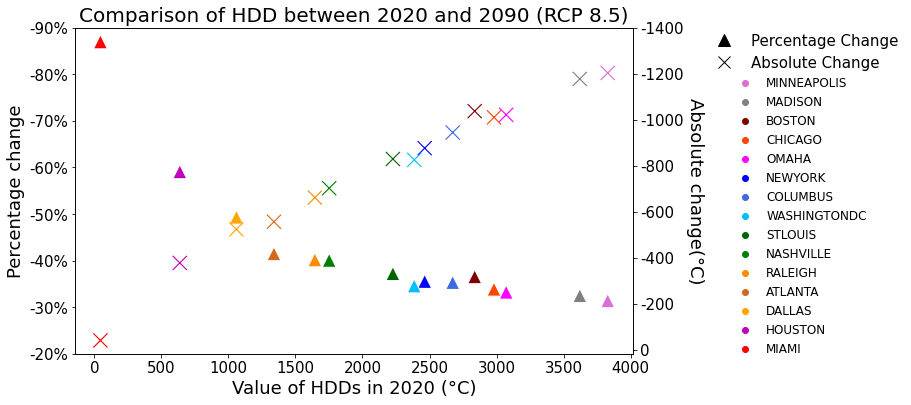

In [51]:
fig, ax = plt.subplots(figsize=(10,6))

# create color list for cities
colors=['orchid','gray','maroon','orangered','magenta',
        'blue','royalblue','deepskyblue','darkgreen','g',
        'darkorange','chocolate','orange','m','red']
city = df['city']
palettes = dict(zip(city, colors))


ax1 = sns.scatterplot(x='actual',y='per_change',hue='city',data=df,
                      legend='full',palette=palettes,s=200,marker='^')
ax2 = ax1.twinx()
ax2 =sns.scatterplot(x='actual',y='actu_change',hue='city',data=df,
                    legend='full',palette=palettes,s=200,marker='x')

"""this is for hdd"""
# ax.set_xticks(np.arange(0,2701,300))
ax1.set_yticks(np.arange(20,100,10))
labels = [str(int(np.round(-it,0)))+"%" for it in np.arange(20,100,10)]
ax1.set_yticklabels(labels)
ax2.set_yticks(np.arange(0,1500,200))
ax2.set_yticklabels(-np.arange(0,1500,200))

ax.set_xlabel('Value of HDDs in 2020 (°C)',fontsize=18)
plt.title('Comparison of HDD between 2020 and 2090 (RCP 8.5)',fontsize=20)


ax.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='y', which='major', labelsize=15)
ax2.legend(loc=(1.17,-0.02),fontsize=12,framealpha=0,facecolor='black')
ax.set_ylabel('Percentage change',fontsize=18)
ax2.set_ylabel('Absolute change(°C)',fontsize=18,rotation=270,labelpad=20)
# p1.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')

# this legend is used to rcognize two data (with the two y axis)
legend_elements = [Line2D([0], [0],marker='^',color='k',lw=0,markersize=12,label='Percentage Change'),
                   Line2D([0], [0],marker='x',color='k',lw=0,markersize=12,label='Absolute Change')]
ax.legend(handles=legend_elements,loc=(1.125,0.85),fontsize=15,framealpha=0)

# fig.savefig('results_plot/HDD_changeofHDD.png',dpi=fig.dpi,bbox_inches='tight')


In [36]:
# data preparation (cdd)
dplot=new_df85_cdd2

val = dplot['2020']
perc_change = dplot['2020-2090']
actu_change = dplot['2090']-dplot['2020']
# dplot45_hdd.index is a list of cities with lat order
df = pd.DataFrame({'city':dplot['city'],'actual':val,'actu_change':actu_change,'per_change':perc_change})
orderby_lat(df)
df.head()

,city,actual,actu_change,per_change
1,MINNEAPOLIS,547,693,126.69
0,MADISON,462,684,148.05
9,BOSTON,561,819,145.99
14,CHICAGO,720,785,109.03
11,OMAHA,784,785,100.13


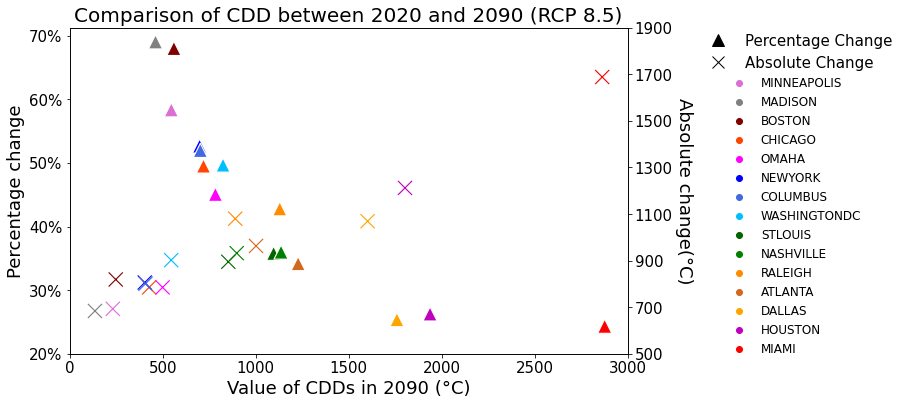

In [42]:
fig, ax = plt.subplots(figsize=(10,6))

# create color list for cities
colors=['orchid','gray','maroon','orangered','magenta',
        'blue','royalblue','deepskyblue','darkgreen','g',
        'darkorange','chocolate','orange','m','red']
city = df['city']
palettes = dict(zip(city, colors))


ax1 = sns.scatterplot(x='actual',y='per_change',hue='city',data=df,
                      legend='full',palette=palettes,s=200,marker='^')
ax2 = ax1.twinx()
ax2 =sns.scatterplot(x='actual',y='actu_change',hue='city',data=df,
                    legend='full',palette=palettes,s=200,marker='x')


"""this is for cdd"""
ax.set_xticks(np.arange(0,3001,500))
ax1.set_yticks(np.arange(50,160,20))
labels = [str(int(np.round(it,0)))+"%" for it in np.arange(20,100,10)]
ax1.set_yticklabels(labels)
ax2.set_yticks(np.arange(500,2000,200))
ax.set_xlabel('Value of CDDs in 2020 (°C)',fontsize=18)
plt.title('Comparison of CDD between 2020 and 2090 (RCP 8.5)',fontsize=20)




ax.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='y', which='major', labelsize=15)
ax2.legend(loc=(1.17,-0.02),fontsize=12,framealpha=0,facecolor='black')
ax.set_ylabel('Percentage change',fontsize=18)
ax2.set_ylabel('Absolute change(°C)',fontsize=18,rotation=270,labelpad=20)
# p1.text(3+0.2, 4.5, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')

# this legend is used to rcognize two data (with the two y axis)
legend_elements = [Line2D([0], [0],marker='^',color='k',lw=0,markersize=12,label='Percentage Change'),
                   Line2D([0], [0],marker='x',color='k',lw=0,markersize=12,label='Absolute Change')]
ax.legend(handles=legend_elements,loc=(1.125,0.85),fontsize=15,framealpha=0)

# fig.savefig('results_plot/CDD_changeofCDD.png',dpi=fig.dpi,bbox_inches='tight')

        